Problem Description
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need
to figure out the accuracy of your model and use that to predict different samples in your test
dataset. In iris dataset there are 150 samples containing following features,
1. Sepal Length
2. Sepal Width
3. Petal length
4. Petal width
Using above 4 features you will classify a flower in one of the three categories,
1. Setosa
2. Versicolour
3. Virginica
Download the iris dataset directly from sklearn.dataset

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [84]:
iris = load_iris()
print(dir(iris))
print(iris.feature_names)
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [85]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target
df['Category'] = df['Category'].replace({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
26,5.0,3.4,1.6,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
145,6.7,3.0,5.2,2.3,virginica
82,5.8,2.7,3.9,1.2,versicolor
133,6.3,2.8,5.1,1.5,virginica


# Create and train logistic regression model

In [86]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names],df["Category"], test_size=0.2)
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
119,6.0,2.2,5.0,1.5
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
10,5.4,3.7,1.5,0.2
24,4.8,3.4,1.9,0.2
116,6.5,3.0,5.5,1.8
30,4.8,3.1,1.6,0.2


In [87]:
Y_test,len(Y_test)

(119     virginica
 3          setosa
 113     virginica
 94     versicolor
 73     versicolor
 89     versicolor
 10         setosa
 24         setosa
 116     virginica
 30         setosa
 26         setosa
 21         setosa
 41         setosa
 22         setosa
 40         setosa
 46         setosa
 146     virginica
 145     virginica
 63     versicolor
 9          setosa
 130     virginica
 102     virginica
 86     versicolor
 5          setosa
 17         setosa
 108     virginica
 141     virginica
 45         setosa
 32         setosa
 29         setosa
 Name: Category, dtype: object,
 30)

In [88]:
model.fit(X_train, Y_train)

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Measure accuracy

In [89]:
model.score(X_test, Y_test)

0.9666666666666667

In [90]:
Pred = model.predict(X_test)

In [94]:
print(model.predict([X_test.iloc[5]]))
print(Y_test.iloc[5])

['versicolor']
versicolor


C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Confusion Matrix

In [92]:
cm = confusion_matrix(Y_test, Pred)
cm

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

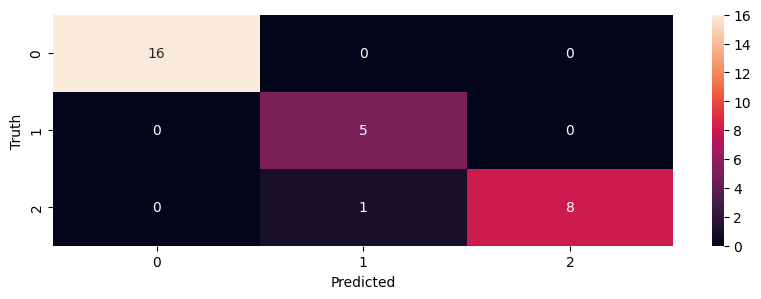

In [93]:
plt.figure(figsize = (10,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')